In [9]:
import pandas as pd

from pathlib import Path

datadir = Path("../Data/").resolve().absolute()
print(datadir)
currency = "BTCUSD"


C:\Users\karan\source\csharp\Crypto-Price-Forecaster\TrainerCLI\Data


In [10]:
# Parse main file data into df
from datetime import datetime

dateparse = lambda x: datetime.strptime(x, "%Y-%m-%d")
main_file = datadir / f"{currency}.csv"

maindf = pd.read_csv(main_file, sep=",", parse_dates=['Date'], date_parser=dateparse)

# Only keep two columns, and reverse the dataset (old to new)
maindf = maindf[["Date", "Last"]][::-1]

print(maindf)


           Date          Last
2698 2014-04-15    505.000000
2697 2014-04-16    538.000000
2696 2014-04-17    508.000000
2695 2014-04-18    482.750000
2694 2014-04-19    507.499900
...         ...           ...
4    2021-10-17  61104.000000
3    2021-10-18  61825.000000
2    2021-10-19  63905.000000
1    2021-10-20  65949.719666
0    2021-10-21  62534.000000

[2699 rows x 2 columns]


<AxesSubplot:xlabel='Date', ylabel='Last'>

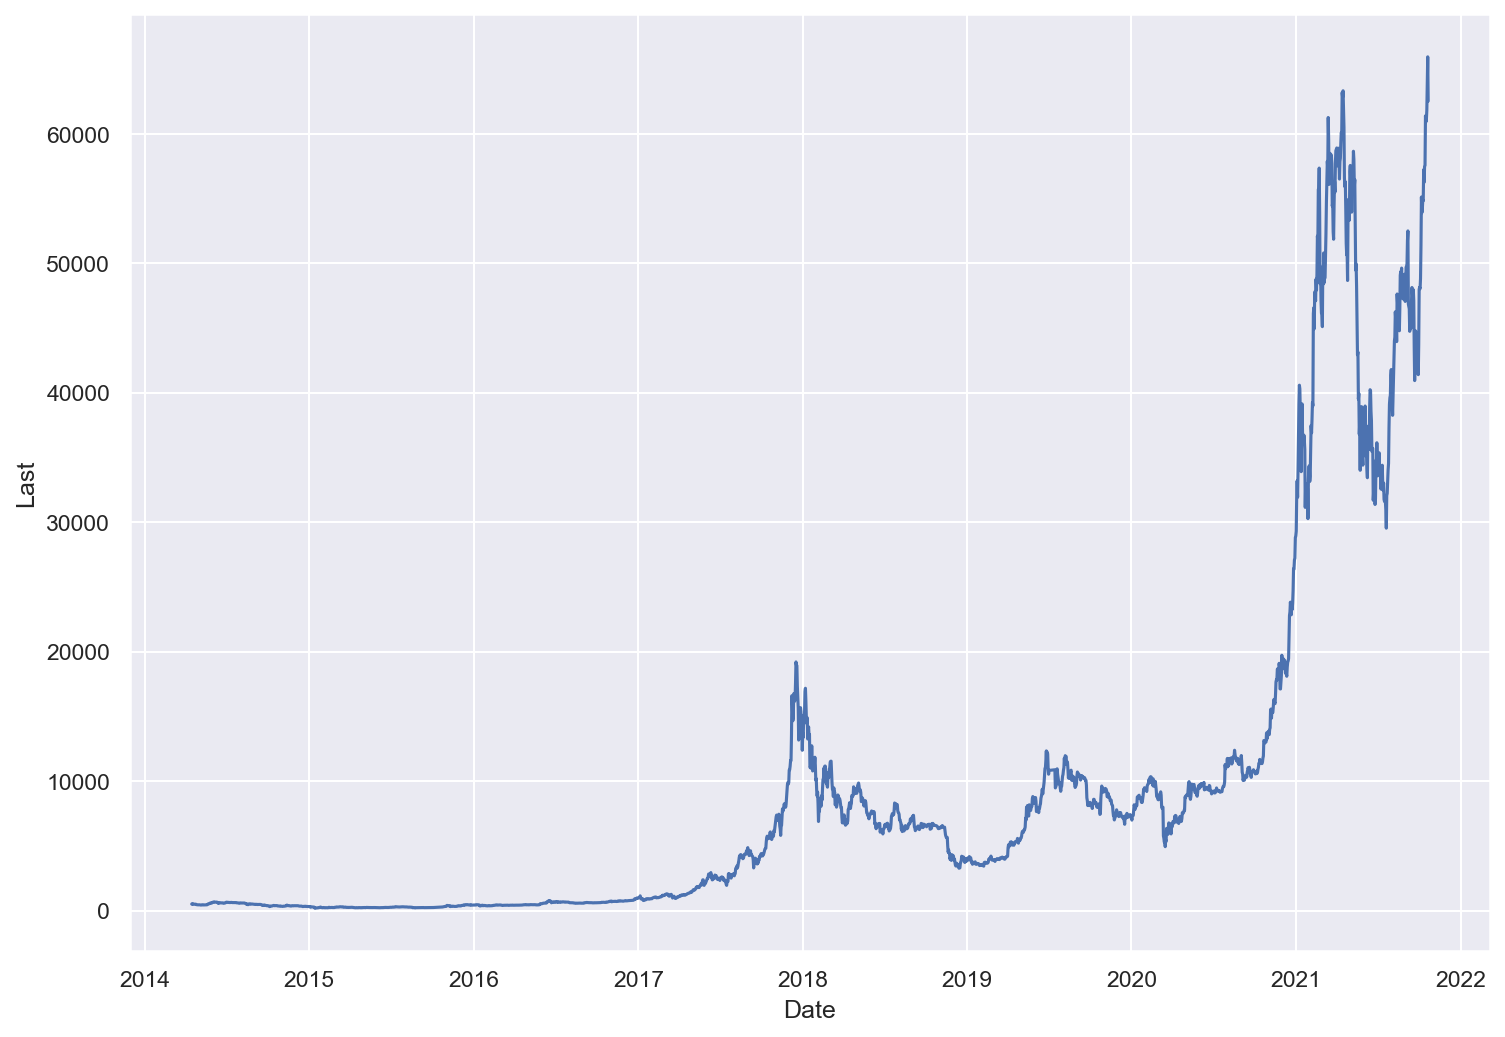

In [11]:
# Plot the main data
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns    

sns.set(rc={'figure.figsize':(11.7,8.27), 'figure.dpi': 150})

sns.lineplot(
    data=maindf, x="Date", y="Last", sort=False
)


In [12]:
testing_split = datadir / f"{currency}_testing-split.csv"
testdf = pd.read_csv(testing_split, parse_dates=['Date'], date_parser=dateparse)
print(testdf)

train_split = datadir / f"{currency}_training-split.csv"
tdf = pd.read_csv(train_split, parse_dates=['Date'], date_parser=dateparse)
print(tdf)


        Date      Last
0 2021-10-17  61104.00
1 2021-10-18  61825.00
2 2021-10-19  63905.00
3 2021-10-20  65949.72
4 2021-10-21  62534.00
           Date        Last
0    2014-04-15    505.0000
1    2014-04-16    538.0000
2    2014-04-17    508.0000
3    2014-04-18    482.7500
4    2014-04-19    507.4999
...         ...         ...
2689 2021-10-12  56258.0000
2690 2021-10-13  57487.0000
2691 2021-10-14  57570.0000
2692 2021-10-15  61394.0000
2693 2021-10-16  60921.0000

[2694 rows x 2 columns]


<AxesSubplot:xlabel='Date', ylabel='Last'>

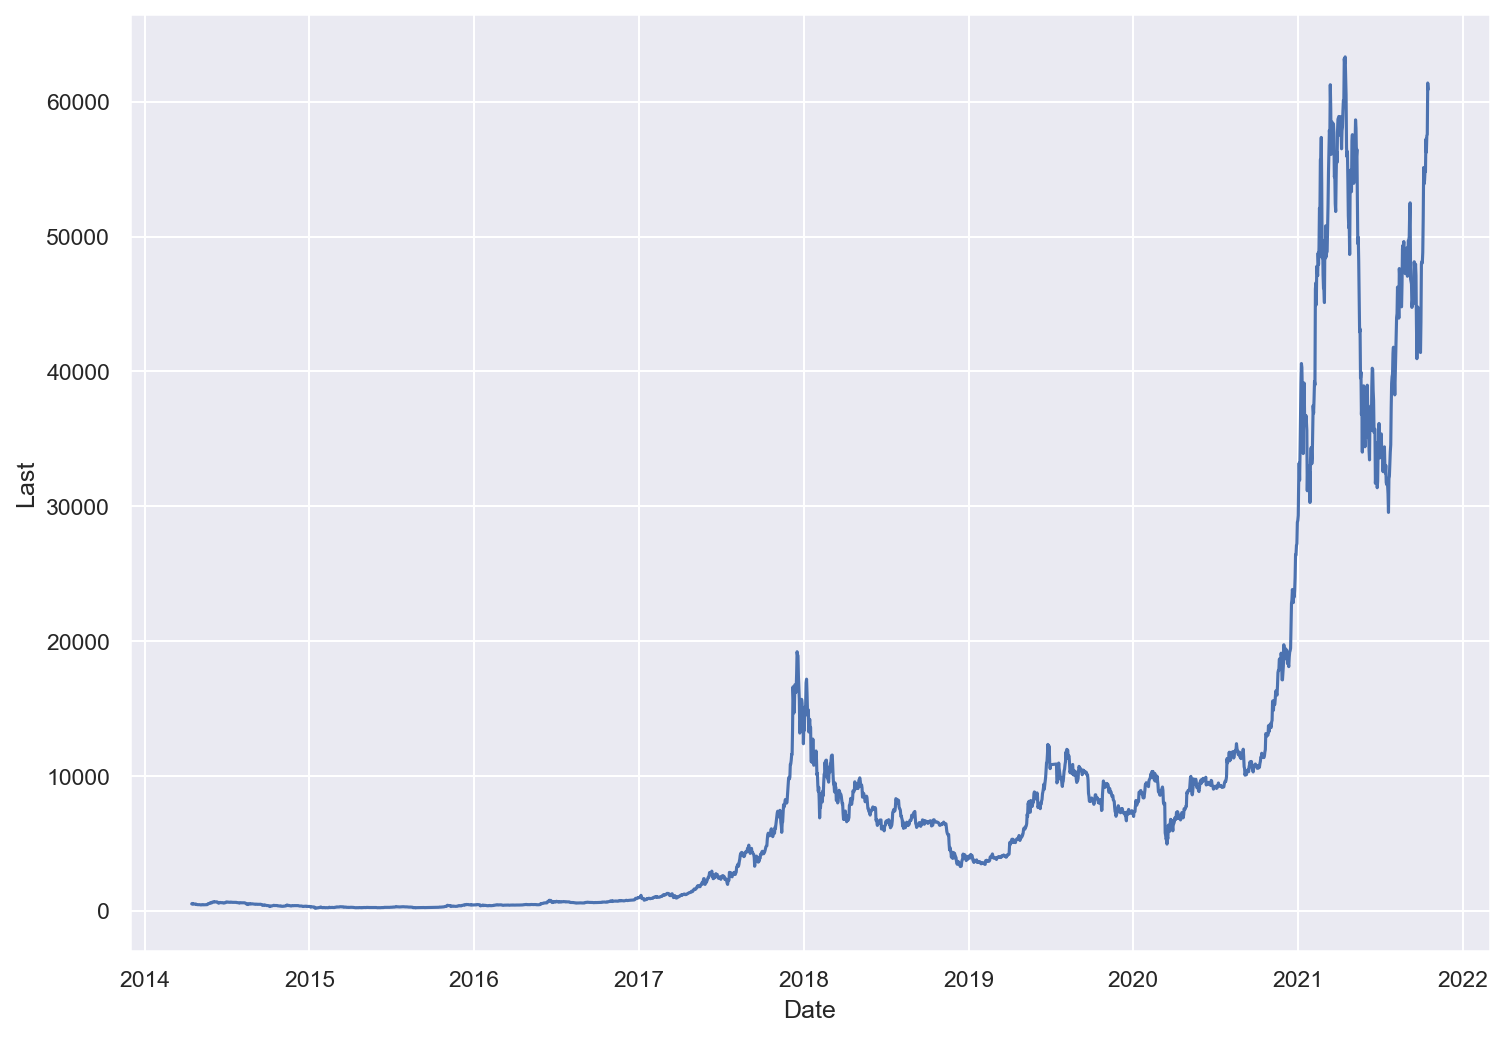

In [13]:
sns.lineplot(
    data=tdf, x="Date", y="Last", sort=False
)

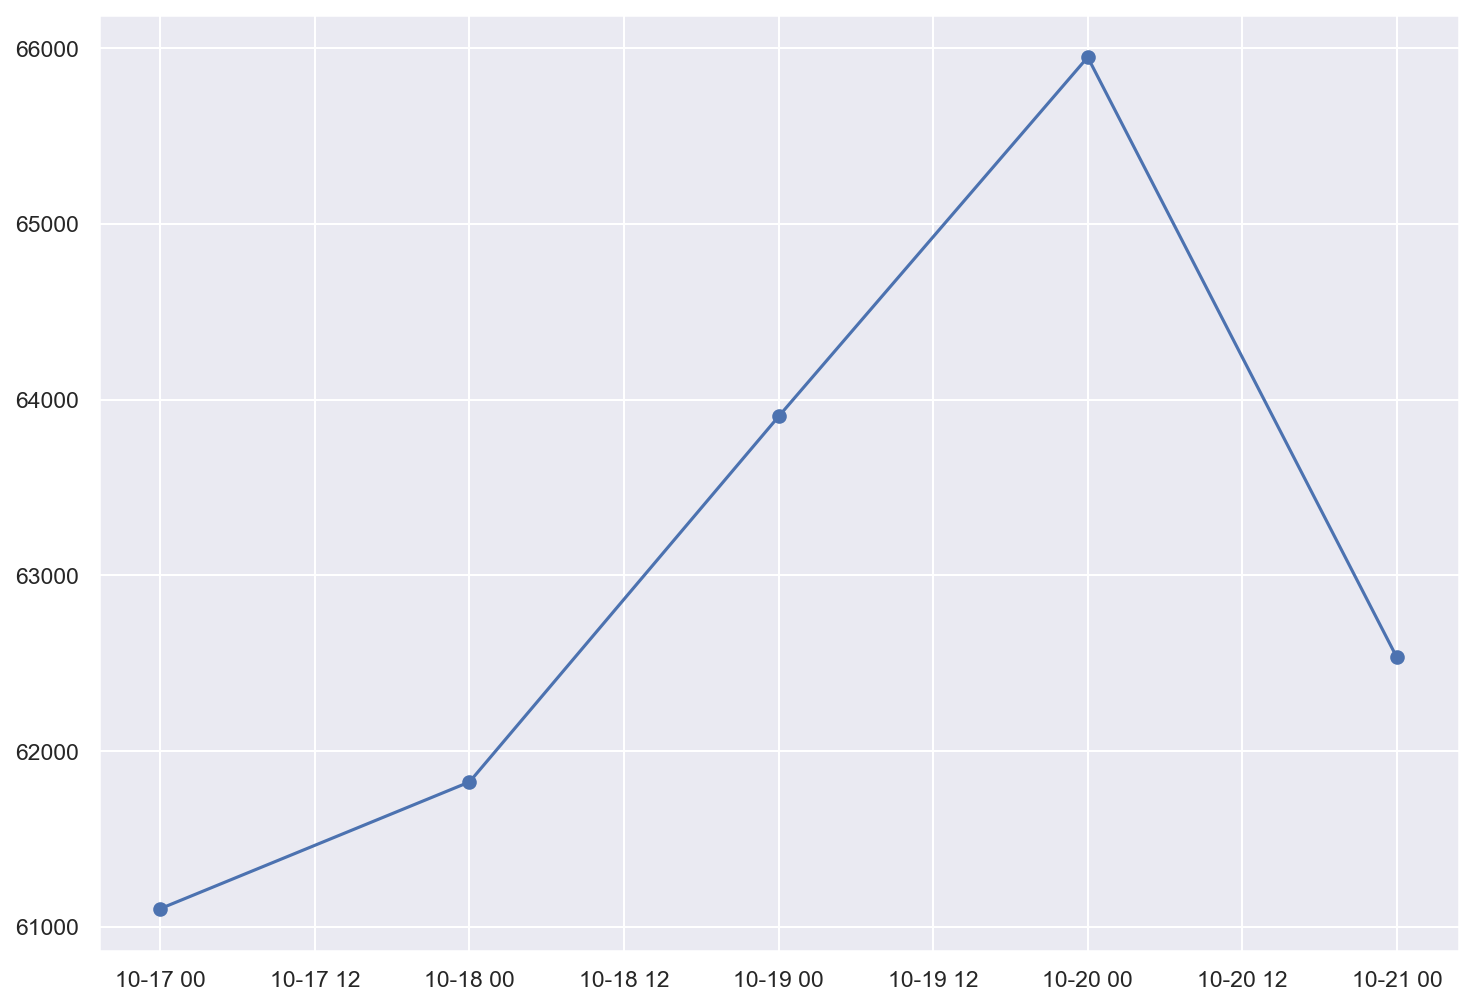

In [14]:
plt.plot(testdf["Date"], testdf["Last"], marker='o')

In [15]:
eval_file = datadir / f"{currency}_evaluation.csv"
edf = pd.read_csv(eval_file, parse_dates=['Date'], date_parser=dateparse)
edf["ConfidenceRange"] = edf["UpperBound"] - edf["LowerBound"]
print(edf)

        Date    Actual   Forecast  LowerBound  UpperBound  ConfidenceRange
0 2021-10-17  61104.00  61531.160   59905.973   63156.348         3250.375
1 2021-10-18  61825.00  62379.203   60709.740   64048.668         3338.928
2 2021-10-19  63905.00  63187.830   61460.440   64915.215         3454.775
3 2021-10-20  65949.72  63962.330   62161.957   65762.700         3600.743
4 2021-10-21  62534.00  64711.140   62821.785   66600.490         3778.705


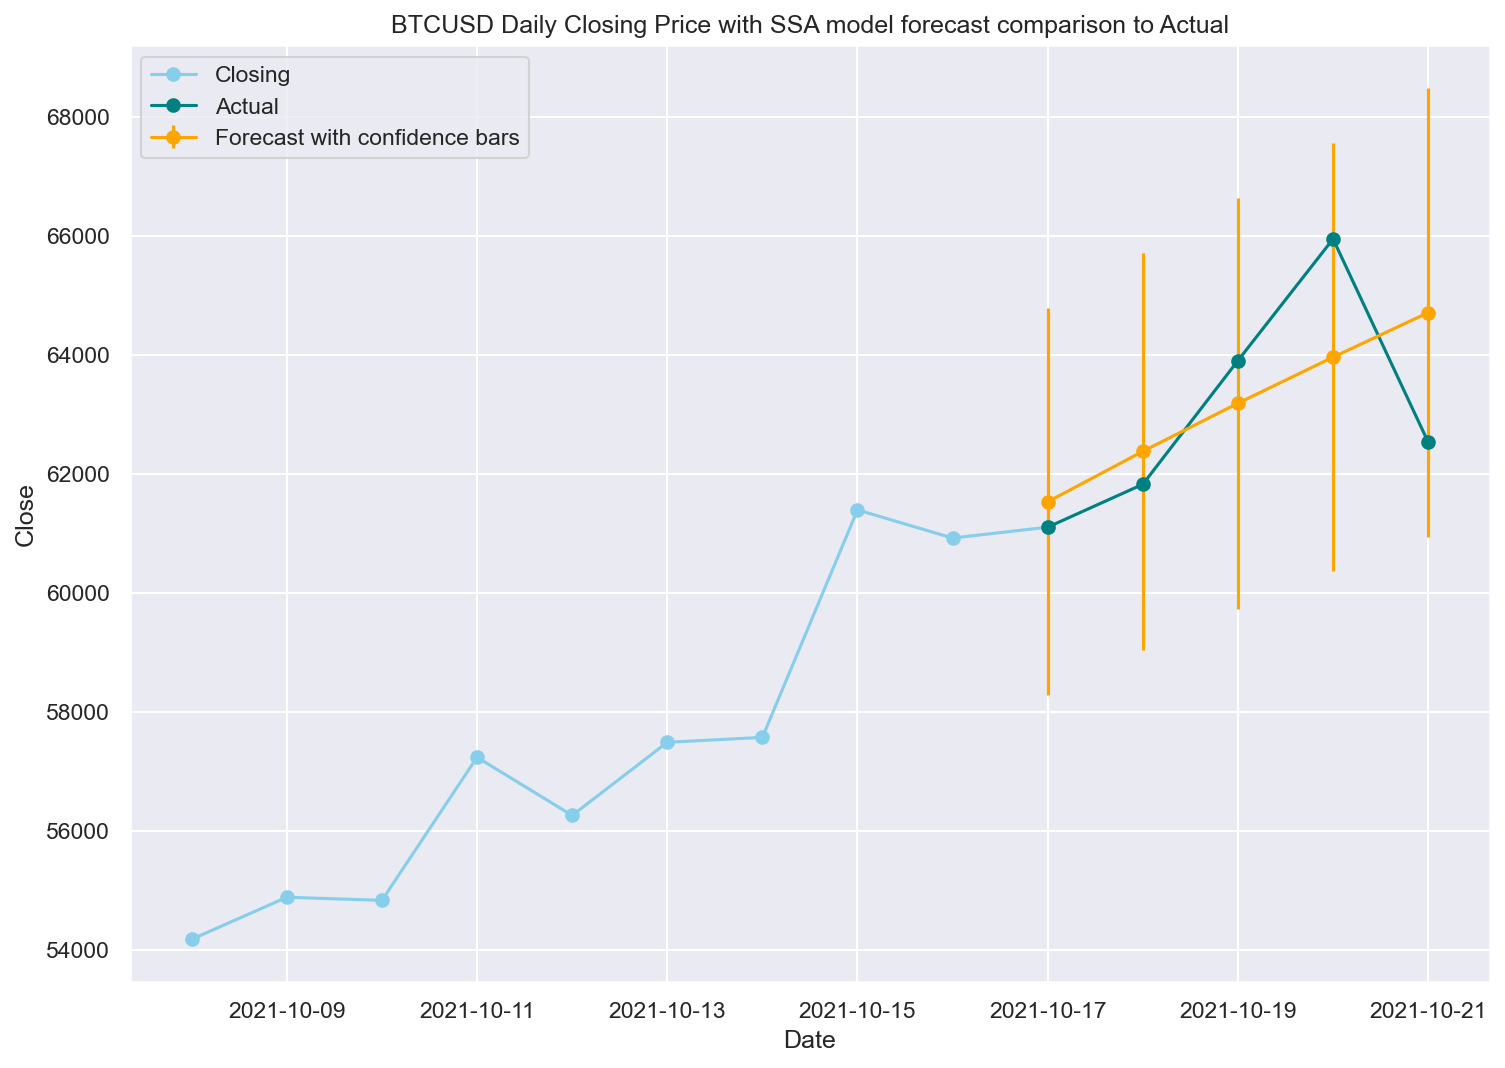

In [16]:

plt.title(f"{currency} Daily Closing Price with SSA model forecast comparison to Actual")
continuous_history_df = tdf.append(testdf.head(1))
plt.plot('Date', 'Last', data=continuous_history_df.tail(10), color="skyblue", marker='o', label="Closing")
plt.plot('Date', 'Actual', data=edf, marker='o', color='teal', label="Actual")
plt.errorbar('Date', 'Forecast', data=edf, marker='o', color='orange', label='Forecast with confidence bars', yerr=edf["ConfidenceRange"])
plt.legend(loc='upper left')
plt.ylabel("Close")
plt.xlabel("Date")
plt.savefig(datadir / f'{currency}_forecast.png')
plt.show()